In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   #if like me you do not have a lot of memory in your GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "" #then these two lines force keras to use your CPU
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv3D, MaxPooling3D, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def array_to_color(array, cmap="Oranges"):
    s_m = plt.cm.ScalarMappable(cmap=cmap)
    return s_m.to_rgba(array)[:,:-1]


def rgb_data_transform(data):
    data_t = []
    for i in range(data.shape[0]):
        data_t.append(array_to_color(data[i]).reshape(16, 16, 16, 3))
    return np.asarray(data_t, dtype=np.float32)

In [5]:
#download data from kaggle
with h5py.File("mnist_3d/train_point_clouds.h5", "r") as hf:    
    a = hf["0"]
    b = a['img'][:]
    s = a['points'][:]

In [7]:
type(a)

h5py._hl.group.Group

In [8]:
type(b)

numpy.ndarray

In [9]:
b.shape

(30, 30)

In [10]:
type(s)

numpy.ndarray

In [11]:
s.shape

(25700, 3)

In [12]:
s

array([[ 0.15      , -0.1094358 ,  0.47305447],
       [ 0.15      , -0.0969358 ,  0.47305447],
       [ 0.15      , -0.0844358 ,  0.47305447],
       ...,
       [ 0.15      , -0.1094358 , -0.50194553],
       [ 0.15      , -0.1094358 , -0.51444553],
       [ 0.15      , -0.1094358 , -0.52694553]])

In [13]:
b

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

Text(0.5, 1.0, 'The figure 5 in 2d')

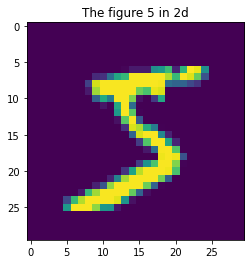

In [16]:
plt.imshow(b)
plt.title('The figure 5 in 2d')

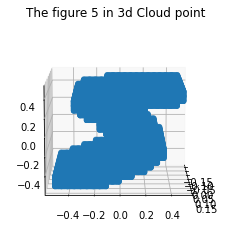

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s[:,0], s[:,1], zs=s[:,2])
ax.view_init(10, 0)
plt.title('The figure 5 in 3d Cloud point')
plt.show()

In [19]:
s[:,0]

array([0.15, 0.15, 0.15, ..., 0.15, 0.15, 0.15])

In [22]:
with h5py.File("mnist_3d/full_dataset_vectors.h5", "r") as hf:    

    # Split the data into training/test features/targets
    X_train = hf["X_train"][:]
    targets_train = hf["y_train"][:]
    X_test = hf["X_test"][:] 
    targets_test = hf["y_test"][:]

    # Determine sample shape
    sample_shape = (16, 16, 16, 3)

    # Reshape data into 3D format
    X_train = rgb_data_transform(X_train)
    X_test = rgb_data_transform(X_test)

    # Convert target vectors to categorical targets
    targets_train = to_categorical(targets_train).astype(np.int32)
    targets_test = to_categorical(targets_test).astype(np.int32)


In [23]:
X_train.shape

(10000, 16, 16, 16, 3)

In [24]:
X_train[0].shape

(16, 16, 16, 3)

In [25]:
targets_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_8 (Conv3D)            (None, 14, 14, 14, 32)    2624      
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 7, 7, 7, 32)       0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 7, 7, 7, 32)       128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 7, 32)       0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 5, 5, 5, 64)       55360     
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 2, 2, 2, 64)       0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 2, 2, 2, 64)      

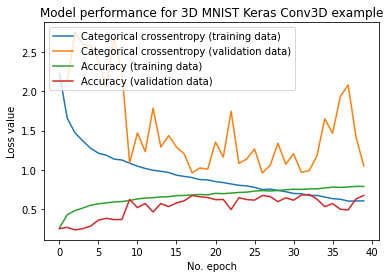

In [31]:
import tensorflow as tf
# Create the model
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=sample_shape))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Conv3D(64, kernel_size=(3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(BatchNormalization(center=True, scale=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
model.summary()
# Fit data to model
history = model.fit(X_train, targets_train,
            batch_size=128,
            epochs=40,
            verbose=1,
            validation_split=0.3)

# Generate generalization metrics
score = model.evaluate(X_test, targets_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Categorical crossentropy (training data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation data)')
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.title('Model performance for 3D MNIST Keras Conv3D example')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [29]:
history.history

{'loss': [2.2723522186279297,
  1.696338415145874,
  1.4754811525344849,
  1.3574767112731934,
  1.2777910232543945,
  1.222347617149353,
  1.186224341392517,
  1.148717999458313,
  1.1164647340774536,
  1.0831745862960815,
  1.0733846426010132,
  1.0247550010681152,
  0.9938010573387146,
  0.9937345385551453,
  0.9805998206138611,
  0.9416717290878296,
  0.927560031414032,
  0.912418782711029,
  0.8987888097763062,
  0.8650848269462585,
  0.8609316349029541,
  0.8433175086975098,
  0.8443678617477417,
  0.8077061772346497,
  0.7948920130729675,
  0.7892321944236755,
  0.7574119567871094,
  0.7440272569656372,
  0.7361244559288025,
  0.7141234874725342,
  0.7127839922904968,
  0.6909706592559814,
  0.688927412033081,
  0.6691833138465881,
  0.6658908128738403,
  0.6405810117721558,
  0.6332257986068726,
  0.6358920931816101,
  0.6021299362182617,
  0.597805380821228],
 'accuracy': [0.24285714328289032,
  0.40799999237060547,
  0.48257142305374146,
  0.5180000066757202,
  0.545571446418

accuracy score: 0.6725


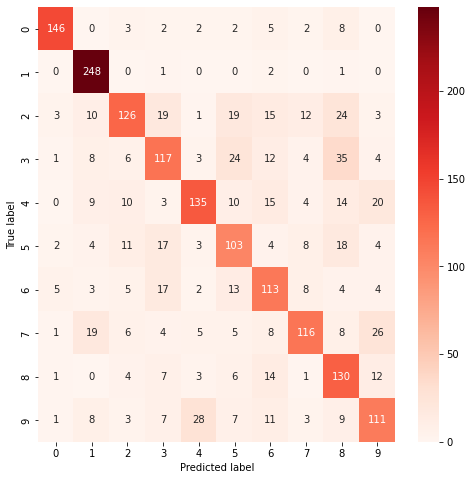

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.pyplot import cm
import pandas as pd
import seaborn as sns
def plot_confusion_matrix(model_name):
    # Predict the values from the validation dataset
    y_pred = model_name.predict(X_test)
    # Because Y_pred is an array of probabilities, we have to convert it to one hot vectors 
    y_pred = np.argmax(y_pred,axis = 1)
    y_test = np.argmax(targets_test,axis=1)
    #Compute and print the accuracy scores:
    print('accuracy score:', accuracy_score(y_test,y_pred))
    # compute the confusion matrix 
    # By definition a confusion matrix C is such that C_i,j is equal to the number of observations known to be in group i but predicted to be in group j.
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm, index = range(10), columns = range(10))
    # plot the confusion matrix
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

plot_confusion_matrix(model)